# Trabalhando com a base SCR em painel

# Análise Descritiva

## 1. Importando as Bibliotecas

In [277]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import math
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # show only two digits
pd.set_option('display.max_columns', 100) # show up to 100 columns
np.random.seed(2023)

### 2.1 – Inspecionar visualmente o conjunto de dados

In [278]:
df = pd.read_csv('dataframe_PF.zip', compression='zip')
#df = pd.read_csv('dataframe_PF.csv')
#df = pd.read_csv('anual_PF.csv')

In [279]:
df.shape

(1121395, 24)

In [280]:
df.head()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,﻿data_base
0,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Prefixado,26,"34245,51","90249,48","225967,36","169241,66","206754,08","54000,51","10249,67","790708,27","78745,89","84224,82",NaN
1,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,45,"223649,51","590710,56","1432633,39","987265,82","477876,55","0,00","12181,13","3724316,96","116526,89","123671,03",NaN
2,2012-06-30,AC,Bancário,NaN,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Sem destinação específica,Prefixado,<= 15,"7036,64","11528,43","0,00","0,00","0,00","0,00","2195,28","20760,35","0,00","18071,06",NaN
3,2012-06-30,AC,Bancário,NaN,PF,PF - Autônomo,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Prefixado,53,"76387,09","193813,29","499462,93","473222,14","967987,34","115717,12","6641,69","2333231,60","22105,44","236600,78",NaN
4,2012-06-30,AC,Bancário,NaN,PF,PF - Autônomo,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,88,"463233,26","1237197,87","3277782,08","2956557,11","2991850,37","214569,50","31625,06","11172815,25","34605,73","875026,84",NaN


Ao juntar os dataframes dos meses, a base ficou com 2 colunas data_base.

In [281]:
unique_coluna = df['data_base'].unique()
print(unique_coluna)

['2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30' '2012-10-31'
 '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28' '2013-03-31'
 '2013-04-30' '2013-05-31' '2013-06-30' '2013-07-31' '2013-08-31'
 '2013-09-30' '2013-10-31' '2013-11-30' '2013-12-31' '2014-01-31'
 '2014-02-28' '2014-03-31' '2014-04-30' '2014-05-31' '2014-06-30'
 '2014-07-31' '2014-08-31' '2014-09-30' '2014-10-31' '2014-11-30'
 '2014-12-31' '2015-01-31' '2015-02-28' '2015-03-31' '2015-04-30'
 '2015-05-31' '2015-06-30' '2015-07-31' '2015-08-31' '2015-09-30'
 '2015-10-31' '2015-11-30' '2015-12-31' '2016-01-31' '2016-02-29'
 '2016-03-31' '2016-04-30' '2016-05-31' '2016-06-30' '2016-07-31'
 '2016-08-31' '2016-09-30' '2016-10-31' '2016-11-30' '2016-12-31'
 '2017-01-31' '2017-02-28' '2017-03-31' '2017-04-30' '2017-05-31'
 '2017-06-30' '2017-07-31' '2017-08-31' '2017-09-30' '2017-10-31'
 '2017-11-30' '2017-12-31' '2018-01-31' '2018-02-28' '2018-03-31'
 '2018-04-30' '2018-05-31' '2018-06-30' '2018-07-31' '2018-08-31' nan
 '2018

In [282]:
numero_de_valores_unicos = df['data_base'].nunique()
print(f"O número de valores únicos na coluna data_base é: {numero_de_valores_unicos}")

O número de valores únicos na coluna data_base é: 134


In [283]:
numero_de_nans = df['data_base'].isna().sum()

# Usando isnull()
# numero_de_nans = df['coluna_name'].isnull().sum()

print(f"O número de valores NaN na coluna 'coluna_name' é: {numero_de_nans}")

O número de valores NaN na coluna 'coluna_name' é: 23624


In [284]:
df.describe()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,﻿data_base
count,1097771,1121395,1121395,814859,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,23624
unique,134,27,3,5,1,8,1,1,9,1,2,5,22348,939854,945178,968016,930791,932349,759228,521837,1110294,327795,427094,3
top,2023-05-31,SP,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Mais de 5 a 10 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,<= 15,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","22230,63","0,00","0,00",2018-11-30
freq,12600,83319,900800,424094,1121395,201983,1121395,1121395,187086,1121395,798342,623250,752204,5382,8350,21903,64966,123649,356390,538258,39,787788,682982,7964


In [285]:
# Excluindo as colunas que só possuem 1 valor
colunas_para_excluir = ['cliente', 'cnae_secao', 'cnae_subclasse', 'modalidade']

df = df.drop(columns=colunas_para_excluir)

In [286]:
df.shape

(1121395, 20)

Verificamos que os valores de data_base faltantes na primeira coluna, estão na última, então iremos juntar todos na primeira coluna e excluir a última

In [287]:
indices_nan = df[df['data_base'].isna()].index

# Em seguida, preencha os valores NaN na primeira coluna 'data_base' com os valores da última coluna 'data_base'.
df.loc[indices_nan, 'data_base'] = df['data_base'].iloc[-1]


In [288]:
df = df.iloc[:, :-1]

In [289]:
df.describe()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,1121395,1121395,1121395,814859,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395,1121395
unique,134,27,3,5,8,9,2,5,22348,939854,945178,968016,930791,932349,759228,521837,1110294,327795,427094
top,2023-10-31,SP,Bancário,S1,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,Com destinação específica,Pós-fixado,<= 15,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","22230,63","0,00","0,00"
freq,36126,83319,900800,424094,201983,187086,798342,623250,752204,5382,8350,21903,64966,123649,356390,538258,39,787788,682982


In [290]:

df['data_base'] = pd.to_datetime(df['data_base'])
df['data_base'] = df['data_base'].dt.strftime('%m-%Y')

In [291]:
# Converta a coluna 'data_base' para o tipo datetime
df['data_base'] = pd.to_datetime(df['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df['ano'] = df['data_base'].dt.year

In [292]:
# Vamos excluir o ano de 2023 pois parece estar em outra escala
df= df[df['ano'] != 2023]

In [293]:
df.shape

(975170, 20)

### 2.2 - Verificando colunas e tipos de dados

In [294]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 975170 entries, 0 to 998793
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       975170 non-null  datetime64[ns]
 1   uf                              975170 non-null  object        
 2   tcb                             975170 non-null  object        
 3   sr                              668634 non-null  object        
 4   ocupacao                        975170 non-null  object        
 5   porte                           975170 non-null  object        
 6   origem                          975170 non-null  object        
 7   indexador                       975170 non-null  object        
 8   numero_de_operacoes             975170 non-null  object        
 9   a_vencer_ate_90_dias            975170 non-null  object        
 10  a_vencer_de_91_ate_360_dias     975170 non-null  object      

Apenas o sr possui valores nulos. todos estão como objeto


### 2.3 - Verificando estatísticas básicas - primeira visão sobre distribuições

In [295]:
df.describe()

,data_base,ano
count,975170,975170.00
mean,2018-07-06 17:47:26.501840384,2018.05
min,2012-06-01 00:00:00,2012.00
25%,2016-01-01 00:00:00,2016.00
50%,2019-03-01 00:00:00,2019.00
75%,2021-04-01 00:00:00,2021.00
max,2022-12-01 00:00:00,2022.00
std,NaN,3.10


In [296]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['ano'], dtype='object')
Index(['uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem', 'indexador',
       'numero_de_operacoes', 'a_vencer_ate_90_dias',
       'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias',
       'a_vencer_de_1081_ate_1800_dias', 'a_vencer_de_1801_ate_5400_dias',
       'a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')
Index([], dtype='object')


### Checando valores nulos

In [297]:
df.isnull().sum()

data_base                              0
uf                                     0
tcb                                    0
sr                                306536
ocupacao                               0
porte                                  0
origem                                 0
indexador                              0
numero_de_operacoes                    0
a_vencer_ate_90_dias                   0
a_vencer_de_91_ate_360_dias            0
a_vencer_de_361_ate_1080_dias          0
a_vencer_de_1081_ate_1800_dias         0
a_vencer_de_1801_ate_5400_dias         0
a_vencer_acima_de_5400_dias            0
vencido_acima_de_15_dias               0
carteira_ativa                         0
carteira_inadimplida_arrastada         0
ativo_problematico                     0
ano                                    0
dtype: int64

A unica coluna com valor nulo é SR, que só tem valor a partir de 2017

In [298]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

data_base : <DatetimeArray>
['2012-06-01 00:00:00', '2012-07-01 00:00:00', '2012-08-01 00:00:00',
 '2012-09-01 00:00:00', '2012-10-01 00:00:00', '2012-11-01 00:00:00',
 '2012-12-01 00:00:00', '2013-01-01 00:00:00', '2013-02-01 00:00:00',
 '2013-03-01 00:00:00',
 ...
 '2022-03-01 00:00:00', '2022-04-01 00:00:00', '2022-05-01 00:00:00',
 '2022-06-01 00:00:00', '2022-07-01 00:00:00', '2022-08-01 00:00:00',
 '2022-09-01 00:00:00', '2022-10-01 00:00:00', '2022-11-01 00:00:00',
 '2022-12-01 00:00:00']
Length: 124, dtype: datetime64[ns]
uf : ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
tcb : ['Bancário' 'Não bancário' 'Cooperativas']
sr : [nan 'S1' 'S2' 'S3' 'S4' 'S5']
ocupacao : ['PF - Aposentado/pensionista' 'PF - Autônomo'
 'PF - Empregado de empresa privada'
 'PF - Empregado de entidades sem fins lucrativos' 'PF - Empresário'
 'PF - Outros' 'PF - Servidor ou empregado público' 'PF - MEI']
porte : 

## 4. Verificando distribuições de dados

Antes de analisar a distrubuição dos dados, precisamos tratar de 2 problemas dnos dados:
+ Os dados numéricos estão como objetos
+ A colunas número de perações possui valores '<= 15' para as instâncias com menos de 15 operações
+ Os dados estão agrupados pelas variáveis categóricas



#### Transformando os dados em numéricos

In [299]:
# Excluindo as colunas que não irei usar
colunas_para_excluir = ['a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias', 'a_vencer_de_1801_ate_5400_dias','a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias', 'a_vencer_de_1081_ate_1800_dias' ]

df = df.drop(columns=colunas_para_excluir)

In [300]:
df['carteira_ativa'] = df['carteira_ativa'].str.replace(',', '.').astype(float)
df['carteira_inadimplida_arrastada'] = df['carteira_inadimplida_arrastada'].str.replace(',', '.').astype(float)
df['ativo_problematico'] = df['ativo_problematico'].str.replace(',', '.').astype(float)


In [301]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico', 'ano'],
      dtype='object')
Index(['uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem', 'indexador',
       'numero_de_operacoes'],
      dtype='object')
Index([], dtype='object')


#### Tratando o problema dos contratos <=15

A coluna numero_de_operaçoes apresenta o valor '<= 15" quando a instancia apresenta menos de 15 contratos, algumas soluções foram elencadas para tratar o problema:
1. fazer uma média do valor dos contratos por porte e ano e dividir a carteira dessas instancias pelo valor medio dos contratos para estimar a quantidade de contratos, limitando a 15, quando o resultado for maior que 15. (df_tratada)
2. desconsiderar as instancias com menos que 15 contratos (df_sup15)
3. desconsiderar a coluna de numero de operações

In [302]:
#Contar quantas linhas tem numero de operações <=15
numero_de_linhas_com_menor_ou_igual_a_15 = (df['numero_de_operacoes']=='<= 15').sum()

print(f"O número de linhas com 'numero_de_operacoes' <= 15 é: {numero_de_linhas_com_menor_ou_igual_a_15}")

O número de linhas com 'numero_de_operacoes' <= 15 é: 651725


In [303]:
# Opção 1: Excluir linhas
linhas_filtradas = df[df['numero_de_operacoes'] == '<= 15']

# Somar os valores da coluna 'carteira_ativa' nas linhas filtradas
soma_carteira_ativa_menor_15 = linhas_filtradas['carteira_ativa'].sum()
soma_carteira_ativa = df['carteira_ativa'].sum()
print(soma_carteira_ativa_menor_15)
print(soma_carteira_ativa)
percentual =soma_carteira_ativa_menor_15/soma_carteira_ativa
print(percentual)

363752006583.56
68071158036156.56
0.005343702341457892


Apesar da grande quantidade de linhas com menos de 15 contratos, em valor de carteira, representam apenas 0,56% do total do valor dos emprestimos

In [304]:
df_sup15= df[df['numero_de_operacoes'] != '<= 15']

In [305]:
df.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes', 'carteira_ativa',
       'carteira_inadimplida_arrastada', 'ativo_problematico', 'ano'],
      dtype='object')

In [306]:
# Opção 2: estimar valores

In [307]:
data_base = pd.to_datetime(df['data_base'])



In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975170 entries, 0 to 998793
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       975170 non-null  datetime64[ns]
 1   uf                              975170 non-null  object        
 2   tcb                             975170 non-null  object        
 3   sr                              668634 non-null  object        
 4   ocupacao                        975170 non-null  object        
 5   porte                           975170 non-null  object        
 6   origem                          975170 non-null  object        
 7   indexador                       975170 non-null  object        
 8   numero_de_operacoes             975170 non-null  object        
 9   carteira_ativa                  975170 non-null  float64       
 10  carteira_inadimplida_arrastada  975170 non-null  float64     

In [309]:
#Vamos descobrir o valor medio dos contratos por porte, para estimar a quantoidade de contratos em que a quantidade é <=15, a intuição é que as pessoas tendem a comprar imóveis no valor maximo que conseguem, sendo o principal limitador a renda
#inicialmente vamos fazer um novo dataframe só com as linhas com contratos com >15
df2=df.loc[df['numero_de_operacoes'] != '<= 15']

In [310]:
df2['numero_de_operacoes'] = df2['numero_de_operacoes'].astype(int)


In [311]:
df2['media_contratos']=df2['carteira_ativa']/df2['numero_de_operacoes']

In [312]:
# Converta a coluna 'data_base' para o tipo datetime
df2['data_base'] = pd.to_datetime(df2['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df2['ano'] = df2['data_base'].dt.year

In [313]:
# Use o método groupby para agrupar os dados por 'uf' e 'ano' e, em seguida, calcule a média
#media_por_uf_ano = df2.groupby(['uf', 'ano'])['media_contratos'].mean()
media_por_porte = df2.groupby(['porte', 'ano'])['media_contratos'].mean().reset_index()

In [314]:
media_por_porte

,porte,ano,media_contratos
0,PF - Acima de 20 salários mínimos,2012,116593.10
1,PF - Acima de 20 salários mínimos,2013,151819.37
2,PF - Acima de 20 salários mínimos,2014,234763.46
3,PF - Acima de 20 salários mínimos,2015,306536.30
4,PF - Acima de 20 salários mínimos,2016,313252.27
...,...,...,...
93,PF - Sem rendimento,2018,132970.88
94,PF - Sem rendimento,2019,103211.03
95,PF - Sem rendimento,2020,118028.65
96,PF - Sem rendimento,2021,145626.88


In [315]:
#Fazer um novo data frame com as linhas com numero de contratos <=15
df3=df.loc[df['numero_de_operacoes'] == '<= 15']

In [316]:
# Converta a coluna 'data_base' para o tipo datetime
df3['data_base'] = pd.to_datetime(df3['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df3['ano'] = df3['data_base'].dt.year

In [317]:
# Realize a junção dos DataFrames usando a coluna 'uf' e 'ano' como chave
#df3 = df3.merge(media_por_uf_ano.reset_index(), on=['porte', 'uf'], how='left')
df3 = df3.merge(media_por_porte.reset_index(), on=['porte','ano'], how='left')

# Renomeie a coluna resultante para 'media_contratos'
df3.rename(columns={'media_contratos': 'media_contratos'}, inplace=True)


In [318]:
df3.tail(3)

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano,index,media_contratos
651722,2022-12-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 3 a 5 salários mínimos,Com destinação específica,Prefixado,<= 15,29082.22,0.00,0.00,2022,75,132498.13
651723,2022-12-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 3 a 5 salários mínimos,Com destinação específica,Índices de preços,<= 15,1213127.95,319234.98,326580.83,2022,75,132498.13
651724,2022-12-01,TO,Não bancário,S3,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,Com destinação específica,Prefixado,<= 15,192295.03,0.00,0.00,2022,86,174917.74


In [319]:
df3['numero_de_operacoes'] =df3['carteira_ativa']/df3['media_contratos'] 

In [320]:
media_por_porte.isnull().sum()

porte              0
ano                0
media_contratos    0
dtype: int64

In [321]:
df3.isnull().sum()

data_base                              0
uf                                     0
tcb                                    0
sr                                182937
ocupacao                               0
porte                                  0
origem                                 0
indexador                              0
numero_de_operacoes                    0
carteira_ativa                         0
carteira_inadimplida_arrastada         0
ativo_problematico                     0
ano                                    0
index                                  0
media_contratos                        0
dtype: int64

In [322]:
# Arredonde os valores para cima e converta-os para inteiros
df3['numero_de_operacoes'] = df3['numero_de_operacoes'].apply(lambda x: math.ceil(x)).astype(int)

In [323]:
#atribuir valor 15 para as linhas em que o valor estimado for maior que 15
# Defina uma função que limita o valor a 15 se for maior ou igual a 15
def limitar_valor(valor):
    return min(valor, 15)

# Aplique a função à coluna 'numero_de_operacoes'
df3['numero_de_operacoes'] = df3['numero_de_operacoes'].apply(limitar_valor)

     

In [324]:
df3['numero_de_operacoes'].describe()

count   651725.00
mean         4.11
std          4.09
min          1.00
25%          1.00
50%          2.00
75%          5.00
max         15.00
Name: numero_de_operacoes, dtype: float64

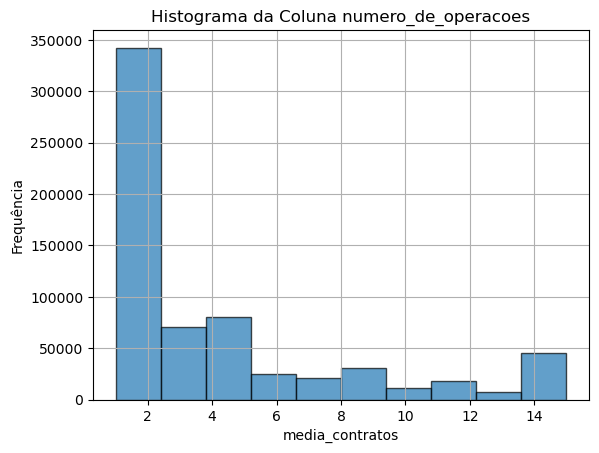

In [325]:
# Crie o histograma da coluna 'numero_de_operacoes'
plt.hist(df3['numero_de_operacoes'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('media_contratos')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna numero_de_operacoes')
plt.grid(True)

# Exiba o histograma
plt.show()

In [326]:
df_tratada=pd.concat([df2, df3])

In [327]:
df_tratada.describe()

,data_base,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano,media_contratos,index
count,975170,975170.00,975170.00,975170.00,975170.00,975170.00,975170.00,651725.00
mean,2018-07-06 17:47:26.501839872,709.68,69804401.32,1086807.58,3597811.92,2018.05,138597.99,51.01
min,2012-06-01 00:00:00,1.00,1.29,0.00,0.00,2012.00,1548.63,0.00
25%,2016-01-01 00:00:00,2.00,127877.84,0.00,0.00,2016.00,69981.69,31.00
50%,2019-03-01 00:00:00,5.00,573201.48,0.00,0.00,2019.00,105485.53,53.00
75%,2021-04-01 00:00:00,35.00,4620708.67,55988.77,205748.02,2021.00,174917.74,74.00
max,2022-12-01 00:00:00,263225.00,25246599410.93,430319395.82,1298110115.28,2022.00,3127803.10,97.00
std,NaN,5148.07,517925066.01,7207875.67,24861415.80,3.10,104260.91,26.97


In [328]:
df_tratada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975170 entries, 0 to 651724
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       975170 non-null  datetime64[ns]
 1   uf                              975170 non-null  object        
 2   tcb                             975170 non-null  object        
 3   sr                              668634 non-null  object        
 4   ocupacao                        975170 non-null  object        
 5   porte                           975170 non-null  object        
 6   origem                          975170 non-null  object        
 7   indexador                       975170 non-null  object        
 8   numero_de_operacoes             975170 non-null  int64         
 9   carteira_ativa                  975170 non-null  float64       
 10  carteira_inadimplida_arrastada  975170 non-null  float64     

In [329]:
df_tratada = df_tratada.drop('ano', axis=1)

In [330]:
df_tratada.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'ocupacao', 'porte', 'origem',
       'indexador', 'numero_de_operacoes', 'carteira_ativa',
       'carteira_inadimplida_arrastada', 'ativo_problematico',
       'media_contratos', 'index'],
      dtype='object')

In [331]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_tratada.csv'

# Salvar o dataframe em um arquivo CSV
df_tratada.to_csv(caminho_arquivo_csv, index=False)

## Análise descritiva e gráficos

In [332]:
# Converta a coluna 'data_base' para o tipo datetime
df['data_base'] = pd.to_datetime(df['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df['ano'] = df['data_base'].dt.year

In [333]:
df_total=df.groupby(['data_base']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_total['inadimplencia']=df_total['carteira_inadimplida_arrastada']/df_total['carteira_ativa']
df_total.head()

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df_total['ano'] = df_total['data_base'].dt.year

In [334]:
# Vamos excluir o ano de 2023 pois parece estar em outra escala
df= df[df['ano'] != 2023]

In [335]:
df_total= df_total[df_total['ano'] != 2023]

In [336]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_total.csv'

# Salvar o dataframe em um arquivo CSV
df_total.to_csv(caminho_arquivo_csv, index=False)

In [337]:
df_total.head()

,data_base,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia,ano
0,2012-06-01,210962439661.37,2811559377.51,0.01,2012
1,2012-07-01,216932554609.75,2721726506.96,0.01,2012
2,2012-08-01,224032328505.99,2819379659.18,0.01,2012
3,2012-09-01,227077645539.52,3022446877.94,0.01,2012
4,2012-10-01,233239688360.74,3016822750.07,0.01,2012


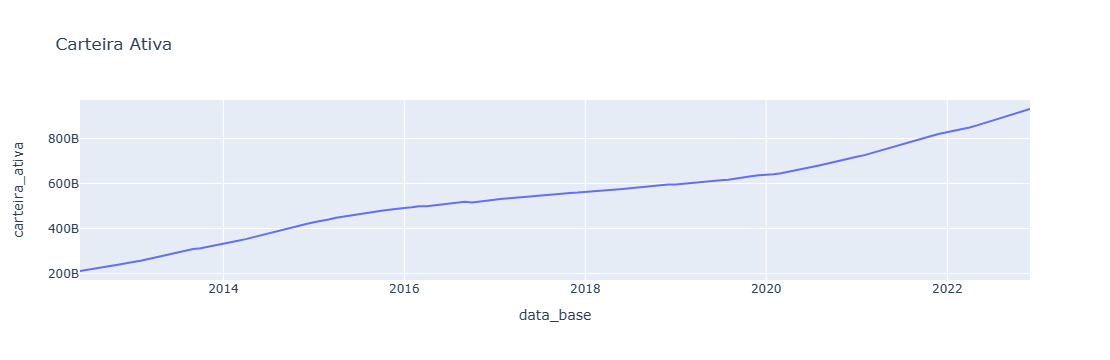

In [338]:
grafico = px.line(df_total, x="data_base", y= 'carteira_ativa', title="Carteira Ativa")
grafico.show()

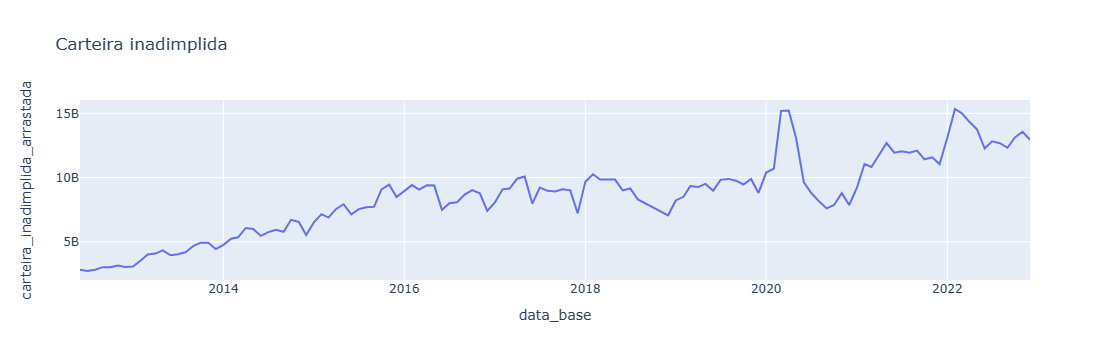

In [339]:
grafico = px.line(df_total, x="data_base", y= 'carteira_inadimplida_arrastada', title="Carteira inadimplida")
grafico.show()

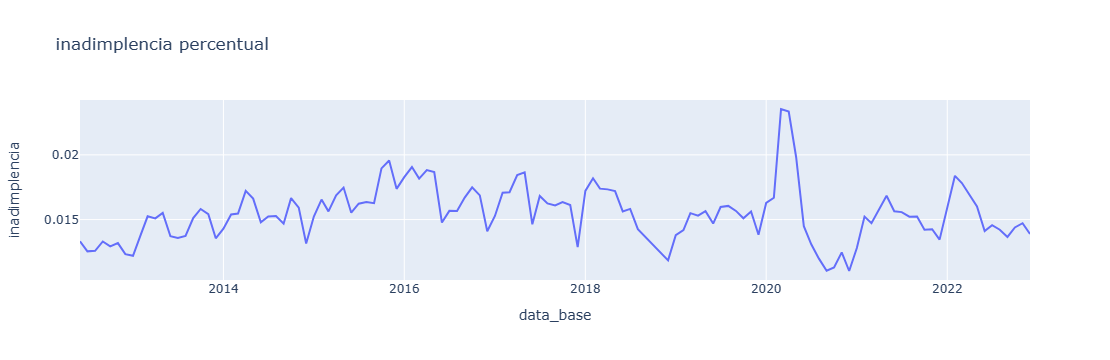

In [340]:
grafico = px.line(df_total, x="data_base", y= 'inadimplencia', title="inadimplencia percentual")
grafico.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


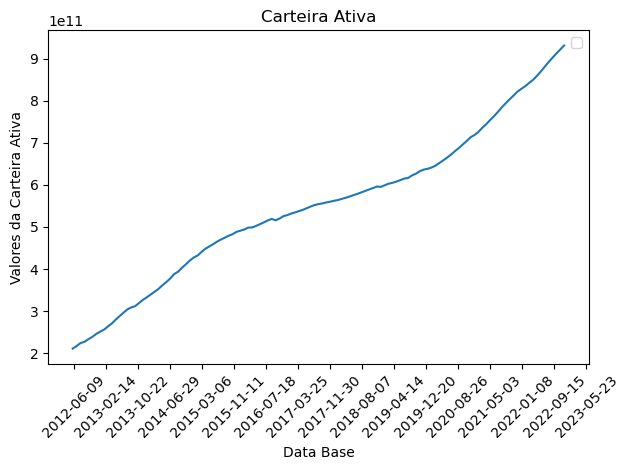

In [341]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['carteira_ativa'])

plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


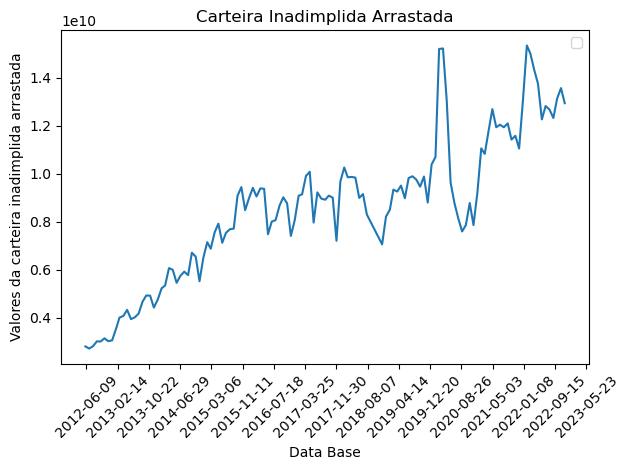

In [342]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['carteira_inadimplida_arrastada'])

plt.xlabel('Data Base')
plt.ylabel('Valores da carteira inadimplida arrastada')
plt.title('Carteira Inadimplida Arrastada')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.savefig('carteira inadimplencia arrastada.png')
plt.show()

### Carteira ativa por renda

In [343]:
# ticket médio por porte
df_tratada['ticket']=df_tratada['carteira_ativa']/df_tratada['numero_de_operacoes']
df_ticket=df_tratada.groupby(['data_base','porte']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum', 'ticket': 'mean'}).reset_index()

In [344]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_ticket.csv'

# Salvar o dataframe em um arquivo CSV
df_ticket.to_csv(caminho_arquivo_csv, index=False)

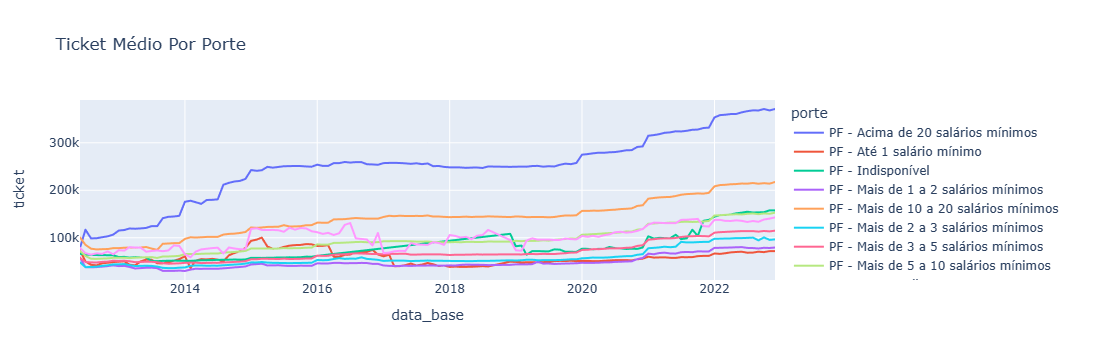

In [345]:
fig = px.line(df_ticket, x="data_base", y="ticket", color='porte', title="Ticket Médio Por Porte")
fig.show()


In [346]:
#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in [ 'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos','PF - Mais de 2 a 3 salários mínimos','PF - Sem rendimento','PF - Indisponível']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 3 a 5 salários mínimos', 'PF - Mais de 5 a 10 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos']:
        return "alta"
    #elif porte.strip() in ['PF - Sem rendimento']:
    #    return "Sem Renda"    
    else:
        return "outros"  # Caso haja algum valor não mapeado

# Aplicando a função para criar a coluna "renda"
df_tratada['renda'] = df_tratada['porte'].apply(mapear_renda)

In [347]:
df_renda=df_tratada.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum', 'numero_de_operacoes': 'sum'}).reset_index()
df_renda['inadimplencia']=df_renda['carteira_inadimplida_arrastada']/df_renda['carteira_ativa']
df_renda['ticket']=df_renda['carteira_ativa']/df_renda['numero_de_operacoes']
df_renda.head()

,data_base,renda,carteira_ativa,carteira_inadimplida_arrastada,numero_de_operacoes,inadimplencia,ticket
0,2012-06-01,alta,188809349048.75,2333938098.64,2913768,0.01,64799.03
1,2012-06-01,baixa,13543856027.20,334173680.77,122692,0.02,110389.07
2,2012-06-01,media,8609234585.42,143447598.10,94802,0.02,90812.79
3,2012-07-01,alta,84523972426.32,764382868.67,568720,0.01,148621.42
4,2012-07-01,baixa,56089159626.48,931597008.91,1468160,0.02,38203.71


In [348]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_renda.csv'

# Salvar o dataframe em um arquivo CSV
df_renda.to_csv(caminho_arquivo_csv, index=False)

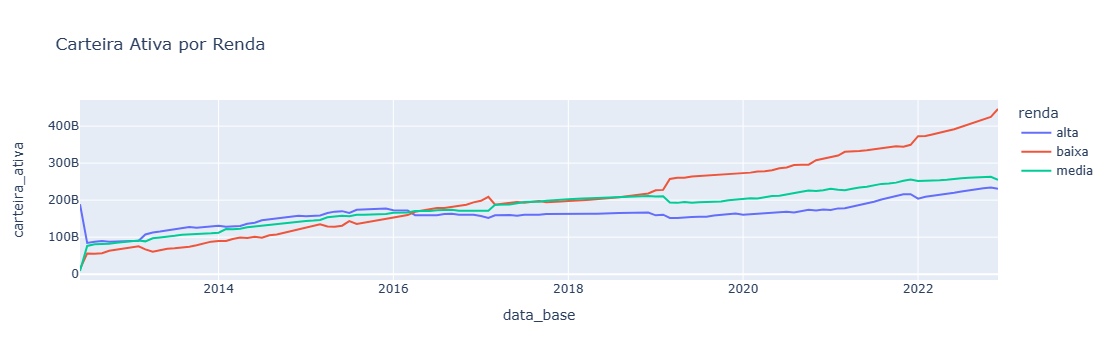

In [349]:
fig = px.line(df_renda, x="data_base", y="carteira_ativa", color='renda', title="Carteira Ativa por Renda")
fig.show()

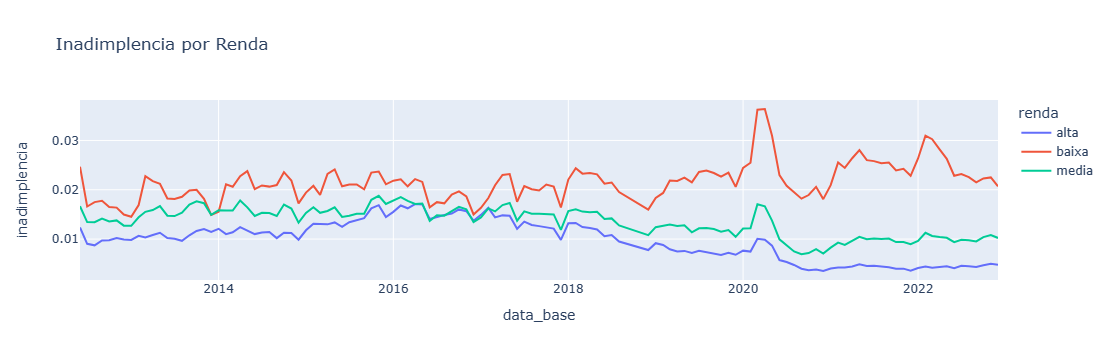

In [350]:
fig = px.line(df_renda, x="data_base", y="inadimplencia", color='renda', title="Inadimplencia por Renda")
fig.show()

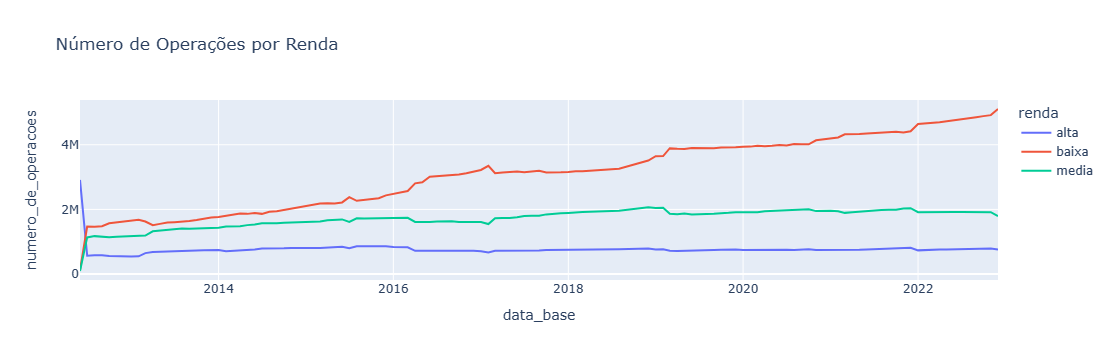

In [351]:
fig = px.line(df_renda, x="data_base", y="numero_de_operacoes", color='renda', title="Número de Operações por Renda")
fig.show()

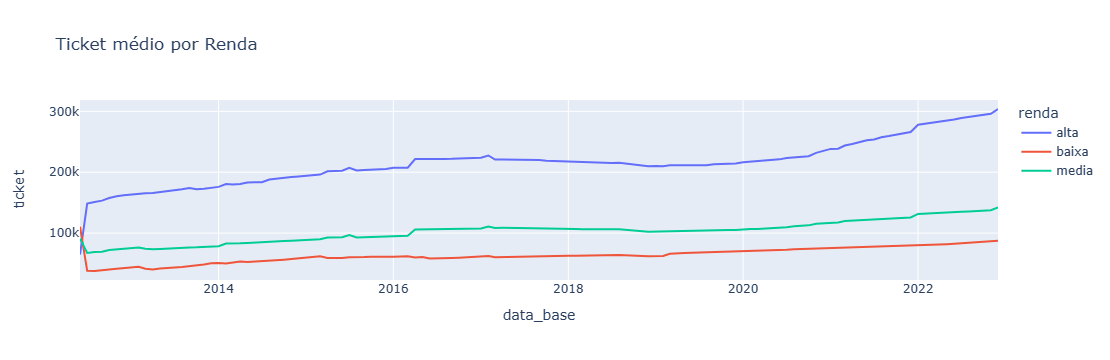

In [352]:
fig = px.line(df_renda, x="data_base", y="ticket", color='renda', title="Ticket médio por Renda")
fig.show()

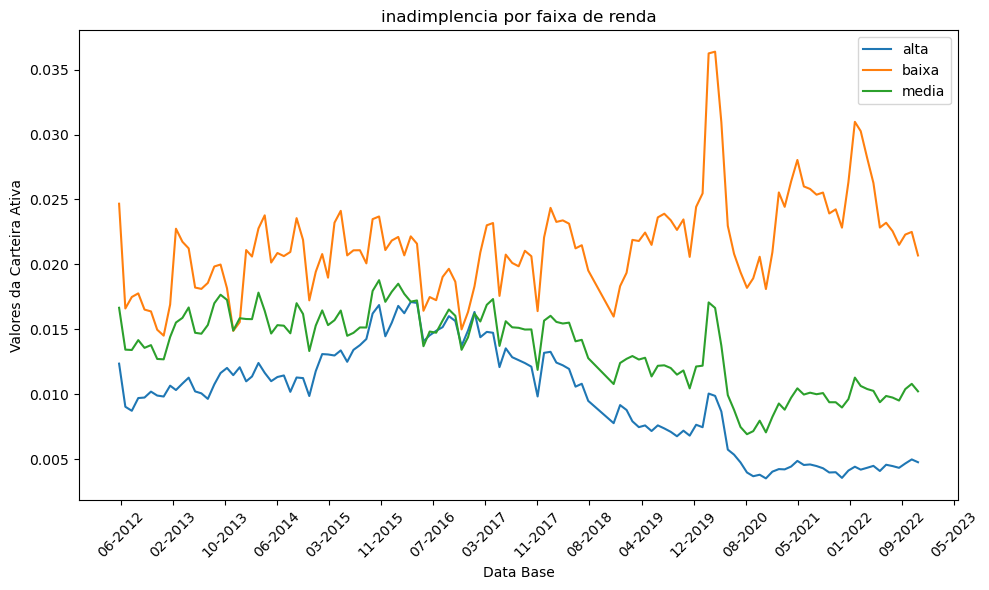

In [353]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('inadimplencia por faixa de renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('inadimplencia por faixa de renda.png')
plt.tight_layout()
plt.show()

In [354]:
#gráfico financiamento total por faixa de renda
#gráfico financiamento direcionado por faixa de renda
#gráfico financiamento não direcionado por faixa de renda

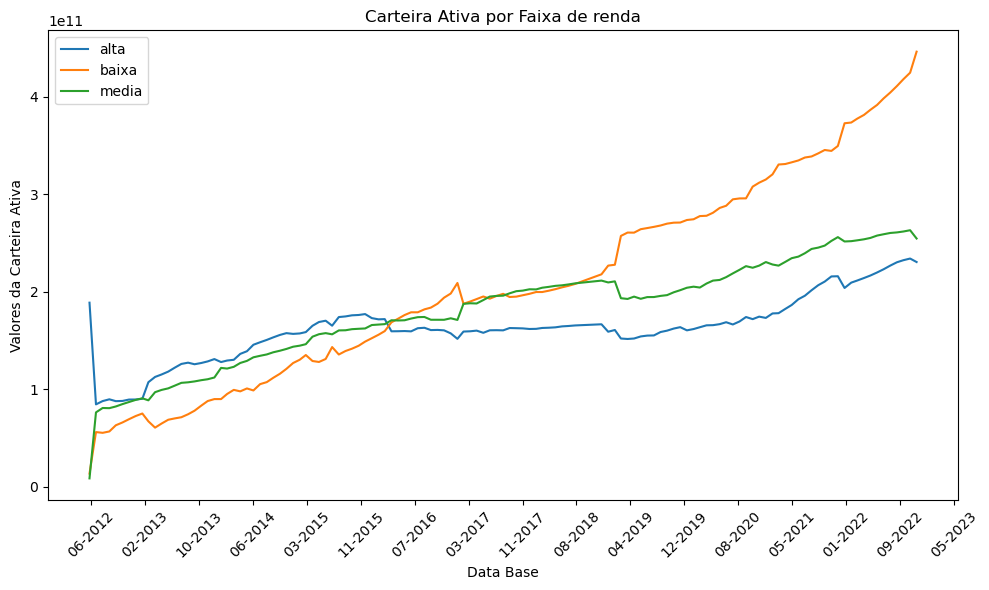

In [355]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
#df_grouped=df_renda.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum'}).reset_index()
#df_grouped = df_renda.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Faixa de renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('Carteira Ativa por Faixa de renda.png')
plt.tight_layout()
plt.show()

Vamos verificar a evolução por renda com e sem destinação específica.
Verificar se destinação específica é direcionado

In [356]:
# crédito direcionado por porte
#Agrupando por faixa de renda
#df_renda=df_renda.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
#df_renda.head()

In [357]:
#Agrupando por faixa de renda com destinaçºao específica
df_destinacao=df_tratada.groupby(['data_base','renda','origem']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_destinacao.head()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,alta,Com destinação específica,182508500012.57,2259416012.33
1,2012-06-01,alta,Sem destinação específica,6300849036.18,74522086.31
2,2012-06-01,baixa,Com destinação específica,13061497680.66,312080435.49
3,2012-06-01,baixa,Sem destinação específica,482358346.54,22093245.28
4,2012-06-01,media,Com destinação específica,6658654609.67,118932839.20


In [358]:
df_renda_com=df_destinacao[df_destinacao['origem']=='Com destinação específica']
df_renda_com.head()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,alta,Com destinação específica,182508500012.57,2259416012.33
2,2012-06-01,baixa,Com destinação específica,13061497680.66,312080435.49
4,2012-06-01,media,Com destinação específica,6658654609.67,118932839.20
6,2012-07-01,alta,Com destinação específica,78499812161.50,704323678.96
8,2012-07-01,baixa,Com destinação específica,55421125549.15,906177657.26


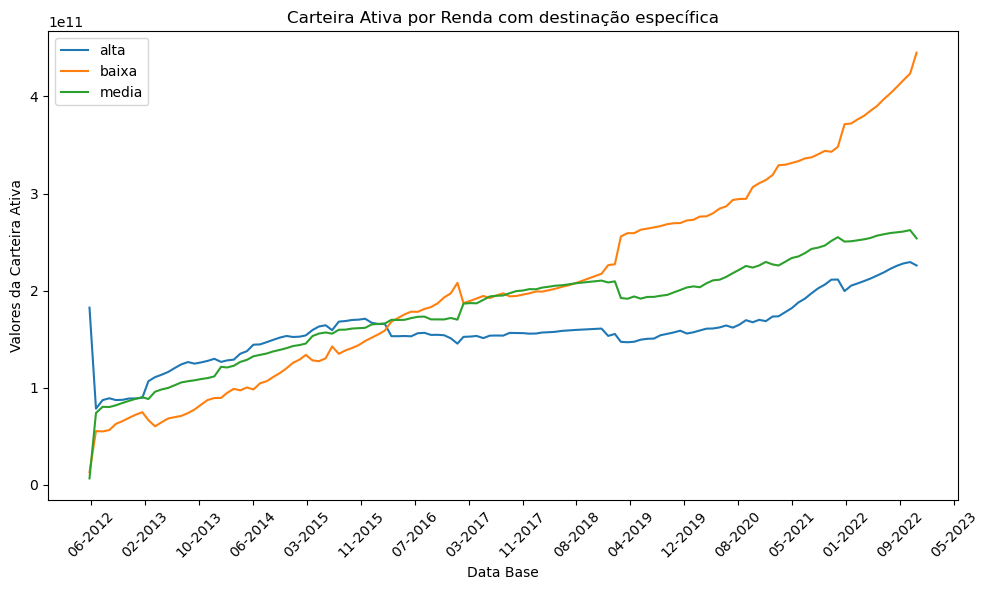

In [359]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
df_grouped = df_renda_com.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_grouped['renda'].unique():
    df_porte = df_grouped[df_grouped['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Renda com destinação específica')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

In [360]:
df_renda_sem=df_destinacao[df_destinacao['origem']!='Com destinação específica']
df_renda_sem.tail()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
735,2022-11-01,baixa,Sem destinação específica,1185404710.07,57766005.53
737,2022-11-01,media,Sem destinação específica,787391966.69,16829545.93
739,2022-12-01,alta,Sem destinação específica,4566929029.81,75829988.52
741,2022-12-01,baixa,Sem destinação específica,1163730780.74,49133452.89
743,2022-12-01,media,Sem destinação específica,794974500.87,14385587.50


In [361]:
df_renda_sem.tail()

,data_base,renda,origem,carteira_ativa,carteira_inadimplida_arrastada
735,2022-11-01,baixa,Sem destinação específica,1185404710.07,57766005.53
737,2022-11-01,media,Sem destinação específica,787391966.69,16829545.93
739,2022-12-01,alta,Sem destinação específica,4566929029.81,75829988.52
741,2022-12-01,baixa,Sem destinação específica,1163730780.74,49133452.89
743,2022-12-01,media,Sem destinação específica,794974500.87,14385587.50


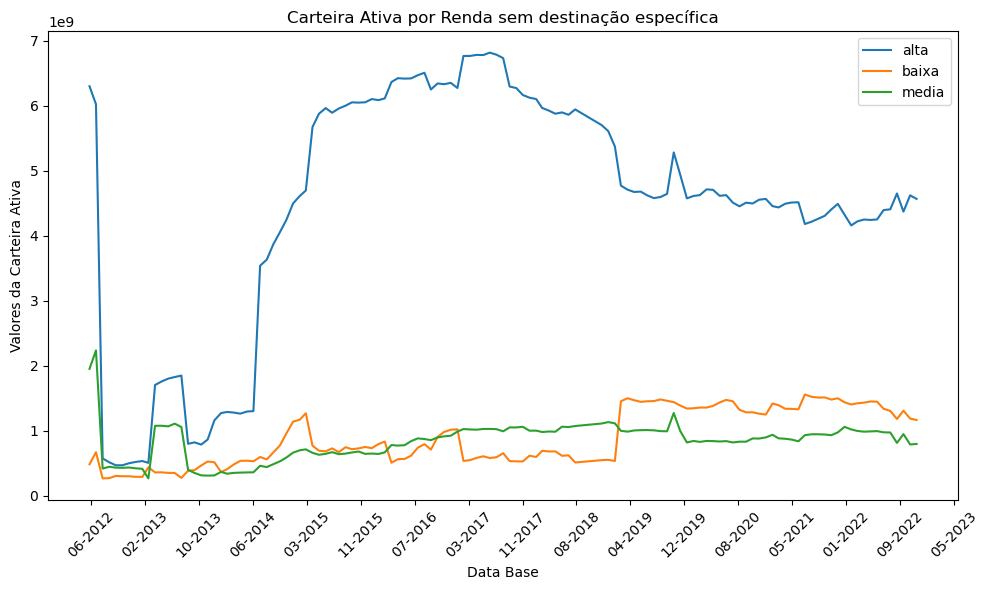

In [362]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
df_grouped = df_renda_sem.groupby(['renda', 'data_base']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_grouped['renda'].unique():
    df_porte = df_grouped[df_grouped['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Renda sem destinação específica')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

Tichet Médio utilizando apenas as linhas com mais de 15 contratos, pois as inferiores não temos o valor correto, pois a base de dados original traz a informação como '<15'

In [363]:
df_sup15.head()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano
0,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82,2012
1,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03,2012
3,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,53,2333231.60,22105.44,236600.78,2012
4,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,88,11172815.25,34605.73,875026.84,2012
11,2012-06-01,AC,Bancário,NaN,PF - Empregado de empresa privada,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,125,6206348.40,152077.14,955782.04,2012


In [364]:
df_sup15['numero_de_operacoes'] = df_sup15['numero_de_operacoes'].astype(int)

In [365]:
df_sup15['ticket_medio']= df_sup15['carteira_ativa']/df_sup15['numero_de_operacoes']

ticket medio por faixa de renda

In [366]:

#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in [ 'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos','PF - Mais de 2 a 3 salários mínimos','PF - Sem rendimento','PF - Indisponível']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 3 a 5 salários mínimos', 'PF - Mais de 5 a 10 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos']:
        return "alta"
    #elif porte.strip() in ['PF - Sem rendimento']:
    #    return "Sem Renda"    
    else:
        return "outros"  # Caso haja algum valor não mapeado


# Aplicando a função para criar a coluna "renda"
df_sup15['renda'] = df_sup15['porte'].apply(mapear_renda)

In [367]:
# Converta a coluna 'data_base' para o tipo datetime
df_sup15['data_base'] = pd.to_datetime(df_sup15['data_base'])

# Crie a coluna 'ano' com o ano da coluna 'data_base'
df_sup15['ano'] = df_sup15['data_base'].dt.year

In [368]:
ticket_por_renda = df_sup15.groupby(['ano','renda'])['ticket_medio'].mean().reset_index()
ticket_por_renda.head()

,ano,renda,ticket_medio
0,2012,alta,105499.55
1,2012,baixa,57274.66
2,2012,media,62619.54
3,2013,alta,122764.65
4,2013,baixa,56909.37


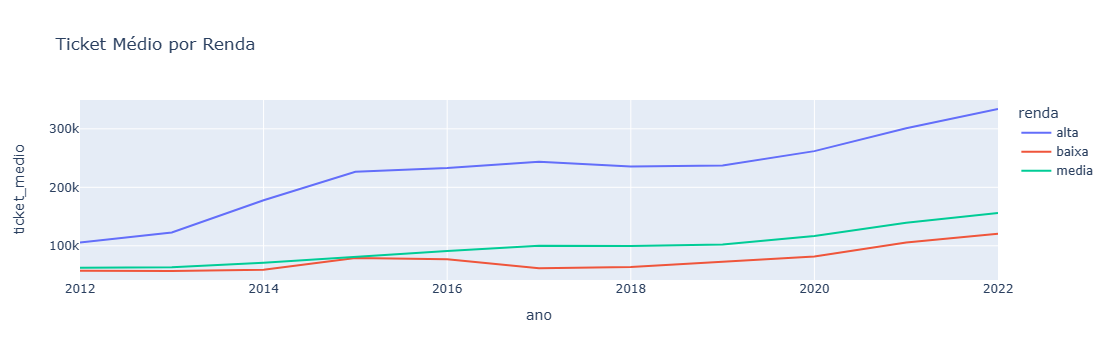

In [369]:
fig = px.line(ticket_por_renda, x="ano", y="ticket_medio", color='renda', title="Ticket Médio por Renda")
fig.show()

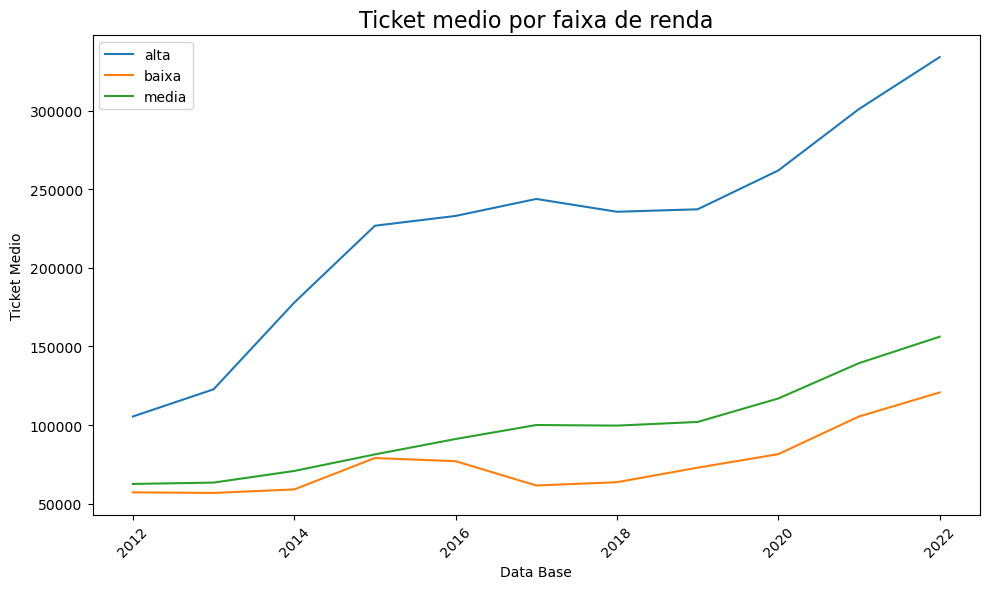

In [370]:
# Agrupando os dados por porte e data base e somando os valores da carteira ativa
#ticket_por_renda = ticket_por_renda.groupby(['renda']).sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in ticket_por_renda['renda'].unique():
    df_porte = ticket_por_renda[ticket_por_renda['renda'] == porte]
    plt.plot(df_porte['ano'], df_porte['ticket_medio'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Ticket Medio')
plt.title('Ticket medio por faixa de renda', fontsize=16)

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x

plt.tight_layout()
plt.savefig('grafico_ticket_medio_por_renda.png')
plt.show()

In [371]:
df.head()

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,ano
0,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82,2012
1,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03,2012
2,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Sem destinação específica,Prefixado,<= 15,20760.35,0.00,18071.06,2012
3,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,53,2333231.60,22105.44,236600.78,2012
4,2012-06-01,AC,Bancário,NaN,PF - Autônomo,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,88,11172815.25,34605.73,875026.84,2012


### Carteira ativa por ocupação

In [372]:
df_ocupacao=df.groupby(['data_base','ocupacao']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_ocupacao['inadimplencia']=df_ocupacao['carteira_inadimplida_arrastada']/df_ocupacao['carteira_ativa']
df_ocupacao.head()



,data_base,ocupacao,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,PF - Aposentado/pensionista,3792468702.90,68216649.20,0.02
1,2012-06-01,PF - Autônomo,16494547644.10,268407750.49,0.02
2,2012-06-01,PF - Empregado de empresa privada,51462782862.45,558234607.47,0.01
3,2012-06-01,PF - Empregado de entidades sem fins lucrativos,333763004.27,2538170.74,0.01
4,2012-06-01,PF - Empresário,29584965124.42,451808847.30,0.02


In [276]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_ocupacao.csv'

# Salvar o dataframe em um arquivo CSV
df_ocupacao.to_csv(caminho_arquivo_csv, index=False)

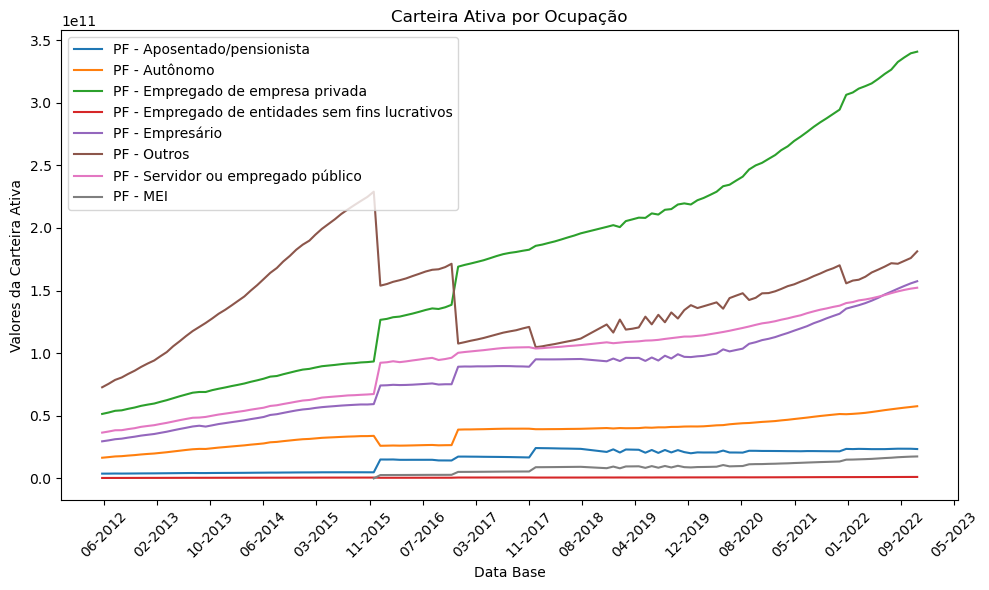

In [158]:

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_ocupacao['ocupacao'].unique():
    df_porte = df_ocupacao[df_ocupacao['ocupacao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Carteira Ativa por Ocupação')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

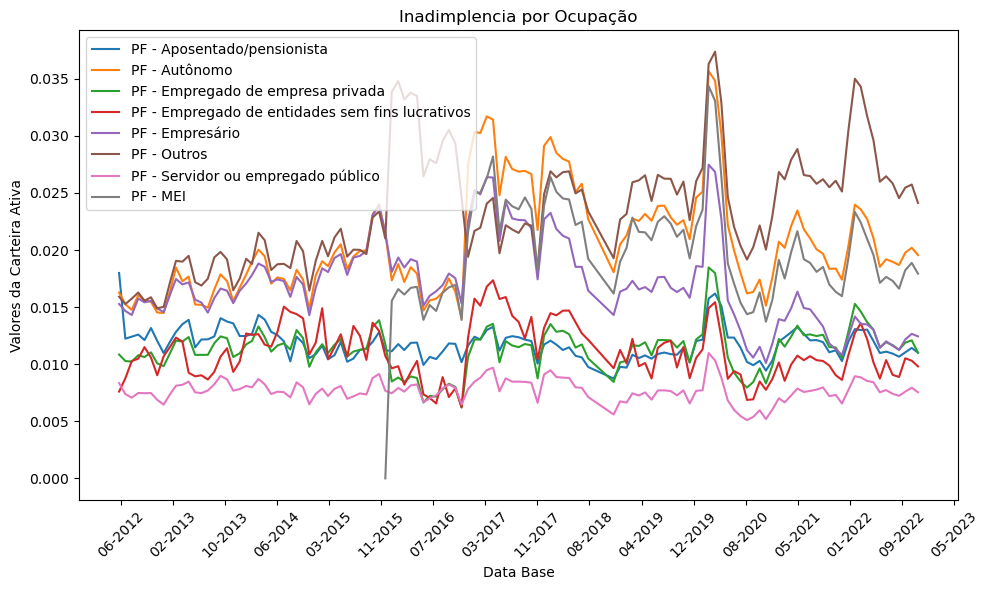

In [159]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_ocupacao['ocupacao'].unique():
    df_porte = df_ocupacao[df_ocupacao['ocupacao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Valores da Carteira Ativa')
plt.title('Inadimplencia por Ocupação')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### TCB e SR

In [160]:
df_tcb = df.groupby(['data_base','tcb'])['carteira_ativa'].sum().reset_index()
df_tcb.tail(20)

,data_base,tcb,carteira_ativa
286,2022-06-01,Cooperativas,1244581010.07
287,2022-06-01,Não bancário,3429026920.48
288,2022-07-01,Bancário,875603960025.37
289,2022-07-01,Cooperativas,1277159153.02
290,2022-07-01,Não bancário,3456438296.17
291,2022-08-01,Bancário,886093356560.91
292,2022-08-01,Cooperativas,1306181189.49
293,2022-08-01,Não bancário,4078917412.77
294,2022-09-01,Bancário,896745638852.37
295,2022-09-01,Cooperativas,1331208622.22


In [161]:
# Criar a coluna 'ano' com o ano da coluna 'data_base'
df_tcb['ano'] = df_tcb['data_base'].dt.year


In [162]:
#Criar tabela TCB anual
df_tcb_anual=df_tcb.groupby(['ano', 'tcb'])['carteira_ativa'].sum().reset_index()

# Calcular a soma da carteira ativa por ano
soma_por_ano = df_tcb_anual.groupby('ano')['carteira_ativa'].sum()

# Adicionar a coluna percentual
df_tcb_anual['percentual'] = df_tcb_anual.apply(lambda row: row['carteira_ativa'] / soma_por_ano[row['ano']] * 100, axis=1)

df_tcb_anual.head()

,ano,tcb,carteira_ativa,percentual
0,2012,Bancário,1588844765268.26,99.51
1,2012,Não bancário,7895002083.67,0.49
2,2013,Bancário,3462044437032.21,99.65
3,2013,Não bancário,12284016000.65,0.35
4,2014,Bancário,4481617570743.92,99.72


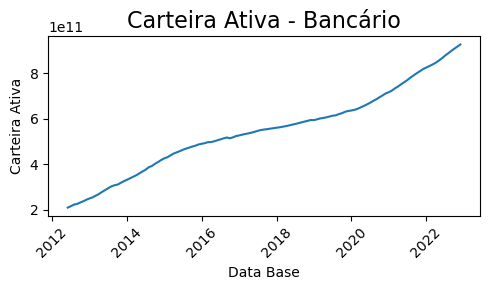

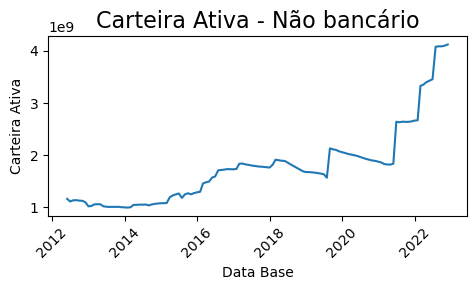

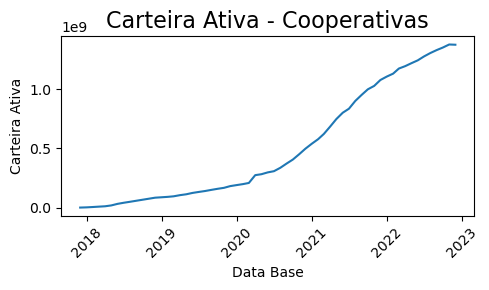

In [163]:
# Categorias únicas em tcb
categorias_tcb = df_tcb['tcb'].unique()

# Criando um gráfico para cada categoria de tcb
for categoria in categorias_tcb:
    # Filtrando o DataFrame para a categoria atual
    df_filtrado = df_tcb[df_tcb['tcb'] == categoria]

    # Criando um novo gráfico para a categoria
    plt.figure(figsize=(5, 3))
    
    # Plotando os dados da categoria atual
    plt.plot(df_filtrado['data_base'], df_filtrado['carteira_ativa'], label=categoria)

    # Configurando os rótulos dos eixos x e y
    plt.xlabel('Data Base')
    plt.ylabel('Carteira Ativa')
    plt.title(f'Carteira Ativa - {categoria}', fontsize=16)
    
    # Configurando a rotação dos rótulos no eixo x para melhor visualização
    plt.xticks(rotation=45)
    #plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x, se necessário
    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))  # Formatação da data, se necessário

    plt.tight_layout()
    # Salvando cada gráfico com um nome único baseado na categoria
    plt.savefig(f'grafico_carteira_tcb_{categoria}.png')
    
    # Exibindo o gráfico
    plt.show()


In [193]:
# Pivotando a tabela para ter os anos como colunas
formatted_df_tcb = df_tcb_anual.pivot(index='tcb', columns='ano', values='percentual')
formatted_df_tcb

ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tcb,,,,,,,,,,,
Bancário,99.51,99.65,99.72,99.74,99.69,99.67,99.67,99.69,99.66,99.60,99.45
Cooperativas,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.02,0.05,0.11,0.14
Não bancário,0.49,0.35,0.28,0.26,0.31,0.33,0.32,0.29,0.29,0.29,0.41


In [165]:
# Caminho do arquivo Excel
caminho_arquivo_excel = 'tabela_tcb.xlsx'

# Salvar o DataFrame em um arquivo Excel
formatted_df_tcb.to_excel(caminho_arquivo_excel)

print(f'Tabela salva como "{caminho_arquivo_excel}"')

Tabela salva como "tabela_tcb.xlsx"


SR

In [166]:
df_sr = df.groupby(['data_base','sr'])['carteira_ativa'].sum().reset_index()
df_sr.tail(20)

,data_base,sr,carteira_ativa
314,2022-09-01,S1,877830026705.28
315,2022-09-01,S2,5595087393.56
316,2022-09-01,S3,16923454979.24
317,2022-09-01,S4,1042722393.64
318,2022-09-01,S5,773059924.80
319,2022-10-01,S1,887560018673.21
320,2022-10-01,S2,5637899949.04
321,2022-10-01,S3,17193312440.24
322,2022-10-01,S4,1054777317.94
323,2022-10-01,S5,760089666.15


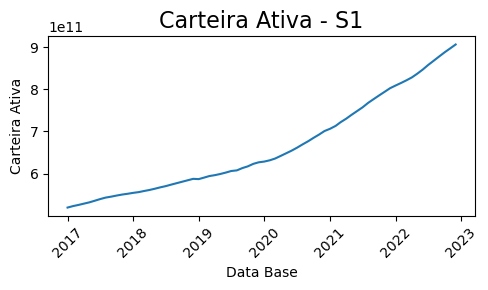

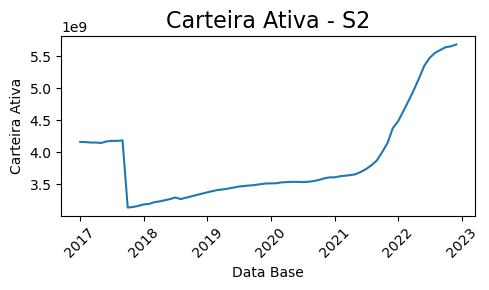

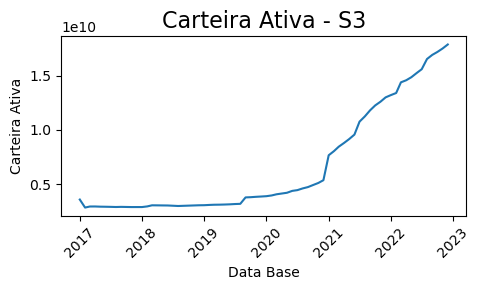

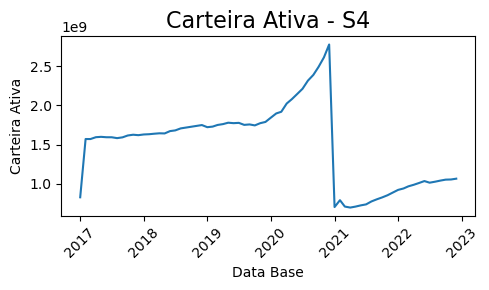

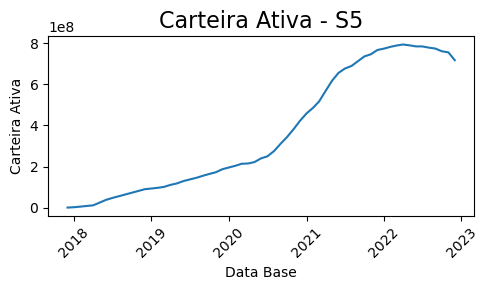

In [167]:
# Categorias únicas em tcb
categorias_sr = df_sr['sr'].unique()

# Criando um gráfico para cada categoria de tcb
for categoria in categorias_sr:
    # Filtrando o DataFrame para a categoria atual
    df_filtrado = df_sr[df_sr['sr'] == categoria]

    # Criando um novo gráfico para a categoria
    plt.figure(figsize=(5, 3))
    
    # Plotando os dados da categoria atual
    plt.plot(df_filtrado['data_base'], df_filtrado['carteira_ativa'], label=categoria)

    # Configurando os rótulos dos eixos x e y
    plt.xlabel('Data Base')
    plt.ylabel('Carteira Ativa')
    plt.title(f'Carteira Ativa - {categoria}', fontsize=16)
    
    # Configurando a rotação dos rótulos no eixo x para melhor visualização
    plt.xticks(rotation=45)
    #plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x, se necessário
    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))  # Formatação da data, se necessário

    plt.tight_layout()
    # Salvando cada gráfico com um nome único baseado na categoria
    plt.savefig(f'grafico_carteira_tcb_{categoria}.png')
    
    # Exibindo o gráfico
    plt.show()


In [168]:
# Criar a coluna 'ano' com o ano da coluna 'data_base'
df_sr['ano'] = df_sr['data_base'].dt.year

In [169]:
df_sr.head()

,data_base,sr,carteira_ativa,ano
0,2017-01-01,S1,519741568556.91,2017
1,2017-01-01,S2,4157759449.66,2017
2,2017-01-01,S3,3588545997.92,2017
3,2017-01-01,S4,829992323.40,2017
4,2017-02-01,S1,523289058823.91,2017


In [170]:

#Criar tabela SR anual
df_sr_anual=df_sr.groupby(['ano', 'sr'])['carteira_ativa'].sum().reset_index()

# Calcular a soma da carteira ativa por ano
soma_por_ano_sr = df_sr_anual.groupby('ano')['carteira_ativa'].sum()

# Adicionar a coluna percentual
df_sr_anual['percentual'] = df_sr_anual.apply(lambda row: row['carteira_ativa'] / soma_por_ano_sr[row['ano']] * 100, axis=1)

df_sr_anual.head()


,ano,sr,carteira_ativa,percentual
0,2017,S1,6445558873519.03,98.46
1,2017,S2,46881527333.26,0.72
2,2017,S3,35622174111.34,0.54
3,2017,S4,18398289731.57,0.28
4,2017,S5,1112897.19,0.00


In [171]:
# Pivotando a tabela para ter os anos como colunas
formatted_df_sr = df_sr_anual.pivot(index='sr', columns='ano', values='percentual')
formatted_df_sr

ano,2017,2018,2019,2020,2021,2022
sr,,,,,,
S1,98.46,98.61,98.58,98.43,97.98,97.42
S2,0.72,0.57,0.56,0.53,0.50,0.60
S3,0.54,0.53,0.55,0.67,1.34,1.78
S4,0.28,0.29,0.29,0.33,0.10,0.12
S5,0.00,0.01,0.02,0.04,0.08,0.09


In [172]:
# Caminho do arquivo Excel
caminho_arquivo_excel = 'tabela_sr.xlsx'

# Salvar o DataFrame em um arquivo Excel
formatted_df_sr.to_excel(caminho_arquivo_excel)

print(f'Tabela salva como "{caminho_arquivo_excel}"')

Tabela salva como "tabela_sr.xlsx"


### Inadimplencia por renda

In [173]:
df_total.head()

,data_base,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia,ano
0,2012-06-01,210962439661.37,2811559377.51,0.01,2012
1,2012-07-01,216932554609.75,2721726506.96,0.01,2012
2,2012-08-01,224032328505.99,2819379659.18,0.01,2012
3,2012-09-01,227077645539.52,3022446877.94,0.01,2012
4,2012-10-01,233239688360.74,3016822750.07,0.01,2012


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


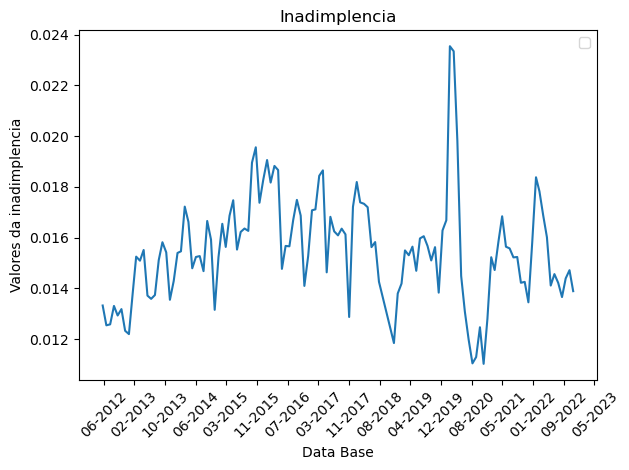

In [174]:
# Configurando os rótulos dos eixos x e y

plt.plot(df_total['data_base'], df_total['inadimplencia'])

plt.xlabel('Data Base')
plt.ylabel('Valores da inadimplencia')
plt.title('Inadimplencia')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

In [175]:
#Agrupando por faixa de renda
#criar coluna 'renda'
# Função para mapear os valores da coluna "porte" para os valores da coluna "renda"
def mapear_renda(porte):
    if porte.strip() in [ 'PF - Até 1 salário mínimo', 'PF - Mais de 1 a 2 salários mínimos']:
        return "baixa"
    elif porte.strip() in ['PF - Mais de 2 a 3 salários mínimos', 'PF - Mais de 3 a 5 salários mínimos']:
        return "media"
    elif porte.strip() in ['PF - Acima de 20 salários mínimos', 'PF - Mais de 5 a 10 salários mínimos', 'PF - Mais de 10 a 20 salários mínimos']:
        return "alta"
    #elif porte.strip() in ['PF - Sem rendimento']:
    #    return "Sem Renda"    
    else:
        return "outros"  # Caso haja algum valor não mapeado

# Aplicando a função para criar a coluna "renda"
df['renda'] = df['porte'].apply(mapear_renda)




df_renda=df.groupby(['data_base','renda']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_renda['inadimplencia']=df_renda['carteira_inadimplida_arrastada']/df_renda['carteira_ativa']
df_renda.head()


,data_base,renda,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,alta,195363094665.14,2428425717.79,0.01
1,2012-06-01,baixa,3193377094.50,58937334.38,0.02
2,2012-06-01,media,2784248422.29,69141961.17,0.02
3,2012-06-01,outros,9621719479.44,255054364.17,0.03
4,2012-07-01,alta,125987979601.39,1297423023.14,0.01


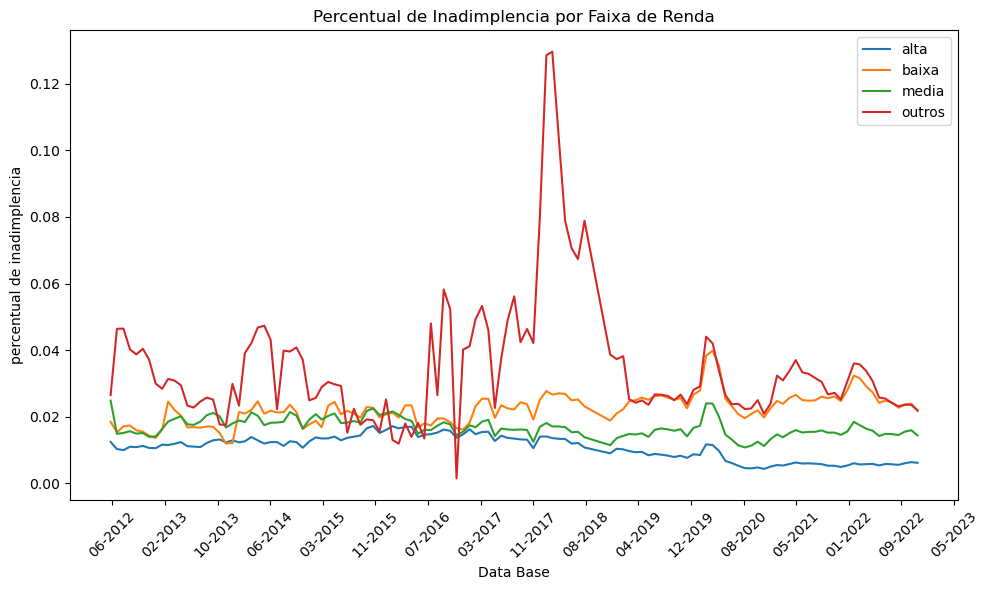

In [176]:

# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('percentual de inadimplencia')
plt.title('Percentual de Inadimplencia por Faixa de Renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

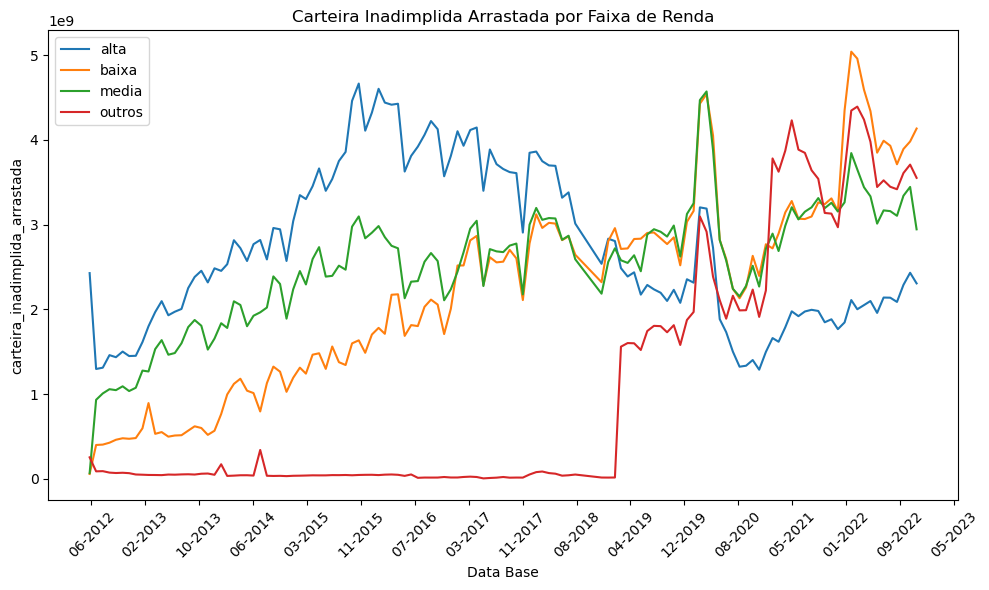

In [177]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_renda['renda'].unique():
    df_porte = df_renda[df_renda['renda'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_inadimplida_arrastada'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('carteira_inadimplida_arrastada')
plt.title('Carteira Inadimplida Arrastada por Faixa de Renda')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### Inadimplencia por ocupação

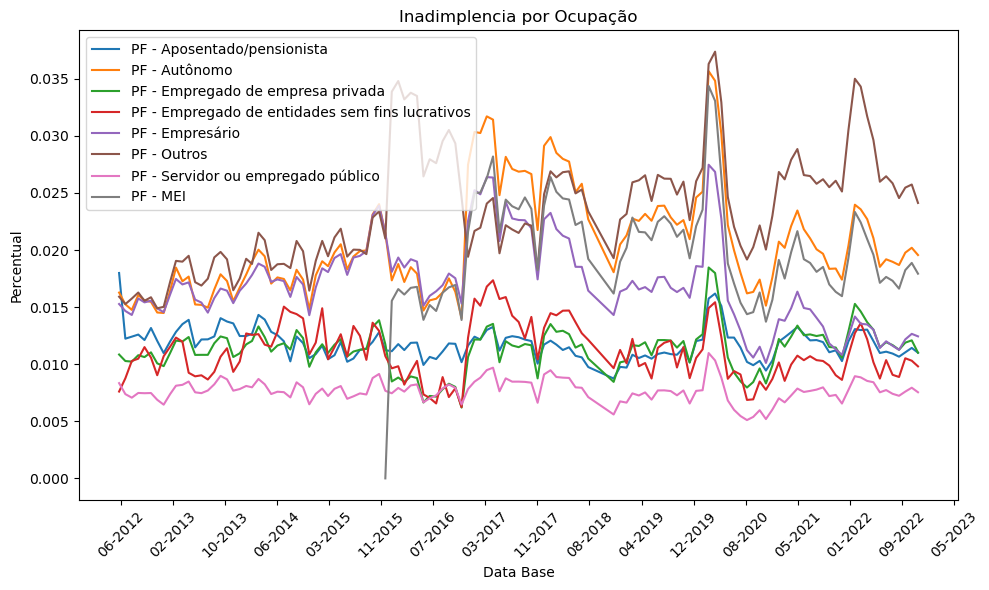

In [178]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_ocupacao['ocupacao'].unique():
    df_porte = df_ocupacao[df_ocupacao['ocupacao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Percentual')
plt.title('Inadimplencia por Ocupação')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

### Por região

In [179]:
df_estado=df.groupby(['data_base','uf']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_estado.head()

,data_base,uf,carteira_ativa,carteira_inadimplida_arrastada
0,2012-06-01,AC,279495633.36,4385848.80
1,2012-06-01,AL,2081764991.08,43180351.64
2,2012-06-01,AM,1206196793.89,15007251.37
3,2012-06-01,AP,109767427.31,1352673.89
4,2012-06-01,BA,7287112919.28,122765449.19


In [180]:

# Use uma condição para atribuir valores à coluna 'regiao' com base na UF de cada estado
for idx, row in df_estado.iterrows():
    uf = row['uf']
    if uf in ['SP', 'MG', 'RJ', 'ES']:
        df_estado.at[idx, 'regiao'] = 'sudeste'
    elif uf in ['AM', 'PA', 'RR', 'AP', 'RO', 'AC', 'TO']:
        df_estado.at[idx, 'regiao'] = 'norte'
    elif uf in ['MT', 'MS', 'GO', 'DF']:
        df_estado.at[idx, 'regiao'] = 'centro-oeste'
    elif uf in ['PI', 'MA', 'PE', 'RN', 'PB', 'CE', 'BA', 'AL', 'SE']:
        df_estado.at[idx, 'regiao'] = 'nordeste'
    elif uf in ['PR', 'SC', 'RS']:
        df_estado.at[idx, 'regiao'] = 'sul'
    else:
        df_estado.at[idx, 'regiao'] = 'outra'

df_estado.head()


,data_base,uf,carteira_ativa,carteira_inadimplida_arrastada,regiao
0,2012-06-01,AC,279495633.36,4385848.80,norte
1,2012-06-01,AL,2081764991.08,43180351.64,nordeste
2,2012-06-01,AM,1206196793.89,15007251.37,norte
3,2012-06-01,AP,109767427.31,1352673.89,norte
4,2012-06-01,BA,7287112919.28,122765449.19,nordeste


In [181]:
df_regiao=df_estado.groupby(['data_base','regiao']).agg({'carteira_ativa': 'sum', 'carteira_inadimplida_arrastada': 'sum'}).reset_index()
df_regiao['inadimplencia']=df_regiao['carteira_inadimplida_arrastada']/df_regiao['carteira_ativa']
df_regiao.head()

,data_base,regiao,carteira_ativa,carteira_inadimplida_arrastada,inadimplencia
0,2012-06-01,centro-oeste,21771752142.60,371539435.41,0.02
1,2012-06-01,nordeste,26943216299.63,444905097.62,0.02
2,2012-06-01,norte,5474826444.41,77653039.95,0.01
3,2012-06-01,sudeste,116158806592.00,1447552442.58,0.01
4,2012-06-01,sul,40613838182.73,469909361.95,0.01


In [373]:
#Salvando a base df_tratada
caminho_arquivo_csv = 'df_regiao.csv'

# Salvar o dataframe em um arquivo CSV
df_regiao.to_csv(caminho_arquivo_csv, index=False)

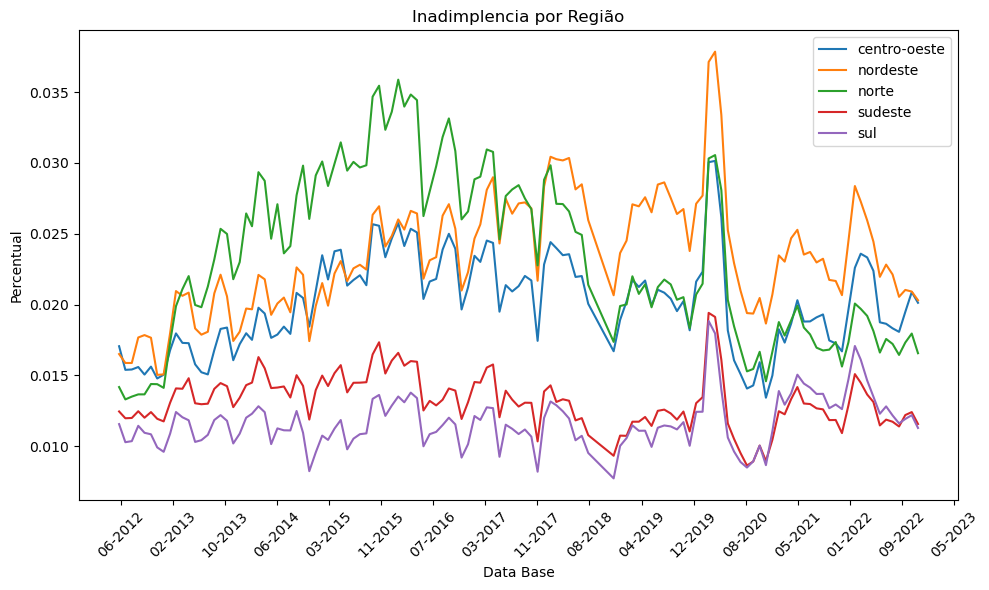

In [182]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_regiao['regiao'].unique():
    df_porte = df_regiao[df_regiao['regiao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['inadimplencia'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('Percentual')
plt.title('Inadimplencia por Região')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

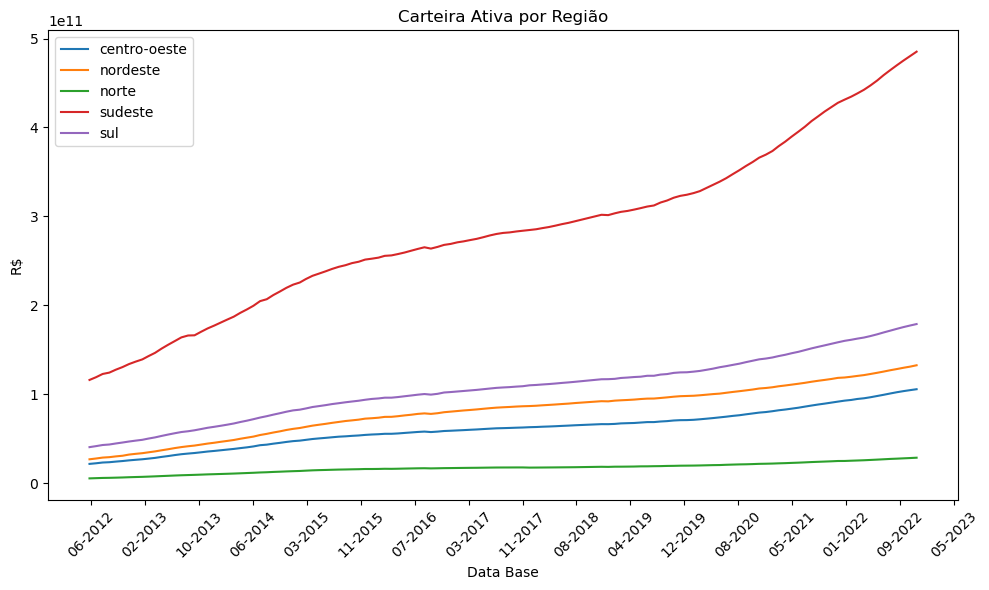

In [183]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

for porte in df_regiao['regiao'].unique():
    df_porte = df_regiao[df_regiao['regiao'] == porte]
    plt.plot(df_porte['data_base'], df_porte['carteira_ativa'], label=porte)

# Configurando os rótulos dos eixos x e y
plt.xlabel('Data Base')
plt.ylabel('R$')
plt.title('Carteira Ativa por Região')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Define o número máximo de rótulos no eixo x
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.savefig('grafico_' + plt.gca().get_title().replace(' ', '_') + '.png')
plt.tight_layout()
plt.show()

# Definindo dados

In [184]:
df_tratada.head(2)

,data_base,uf,tcb,sr,ocupacao,porte,origem,indexador,numero_de_operacoes,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,media_contratos,index,ticket,renda
0,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Prefixado,26,790708.27,78745.89,84224.82,30411.86,NaN,30411.86,alta
1,2012-06-01,AC,Bancário,NaN,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Com destinação específica,Pós-fixado,45,3724316.96,116526.89,123671.03,82762.60,NaN,82762.60,alta


In [185]:
df_tratada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975170 entries, 0 to 651724
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       975170 non-null  datetime64[ns]
 1   uf                              975170 non-null  object        
 2   tcb                             975170 non-null  object        
 3   sr                              668634 non-null  object        
 4   ocupacao                        975170 non-null  object        
 5   porte                           975170 non-null  object        
 6   origem                          975170 non-null  object        
 7   indexador                       975170 non-null  object        
 8   numero_de_operacoes             975170 non-null  int64         
 9   carteira_ativa                  975170 non-null  float64       
 10  carteira_inadimplida_arrastada  975170 non-null  float64     

In [186]:
df_agrupado = df_tratada.groupby(['data_base', 'uf', 'ocupacao', 'porte', 'indexador']).sum(min_count=1)[['numero_de_operacoes', 'carteira_ativa', 'carteira_inadimplida_arrastada']].reset_index()
df_agrupado1 = df_tratada.groupby(['data_base', 'uf', 'ocupacao', 'porte', 'indexador']).sum(min_count=1)[['carteira_ativa']].reset_index()



In [187]:
df_agrupado1.head()

,data_base,uf,ocupacao,porte,indexador,carteira_ativa
0,2012-06-01,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Prefixado,811468.62
1,2012-06-01,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,Pós-fixado,3724316.96
2,2012-06-01,AC,PF - Aposentado/pensionista,PF - Indisponível,Pós-fixado,298715.54
3,2012-06-01,AC,PF - Aposentado/pensionista,PF - Mais de 1 a 2 salários mínimos,Pós-fixado,10696.54
4,2012-06-01,AC,PF - Aposentado/pensionista,PF - Mais de 3 a 5 salários mínimos,Pós-fixado,50800.25


In [188]:
df_agrupado1.shape


(483417, 6)

In [189]:
df_agrupado1.set_index('data_base', inplace=True)

# Modelo

In [190]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números, ex: profissoes vai sair de cientista, professor, mecanico, etc para 0, 1, 2, etc
codificador = LabelEncoder()

# só não aplicamos na coluna de score_credito que é o nosso objetivo
for coluna in df_agrupado1.columns:
    if df_agrupado1[coluna].dtype == "object" and coluna != "score_credito":
        df_agrupado1[coluna] = codificador.fit_transform(df_agrupado1[coluna])

# verificando se realmente

In [191]:
print(df_agrupado1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483417 entries, 2012-06-01 to 2022-12-01
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              483417 non-null  int32  
 1   ocupacao        483417 non-null  int32  
 2   porte           483417 non-null  int32  
 3   indexador       483417 non-null  int32  
 4   carteira_ativa  483417 non-null  float64
dtypes: float64(1), int32(4)
memory usage: 14.8 MB
None
